Dataframe Columns: ['name', 'population(millions)', 'gdp(billions)', 'happiness_index', 'v-dem_idx', 'gini_coef', 'gdp_per_capita']


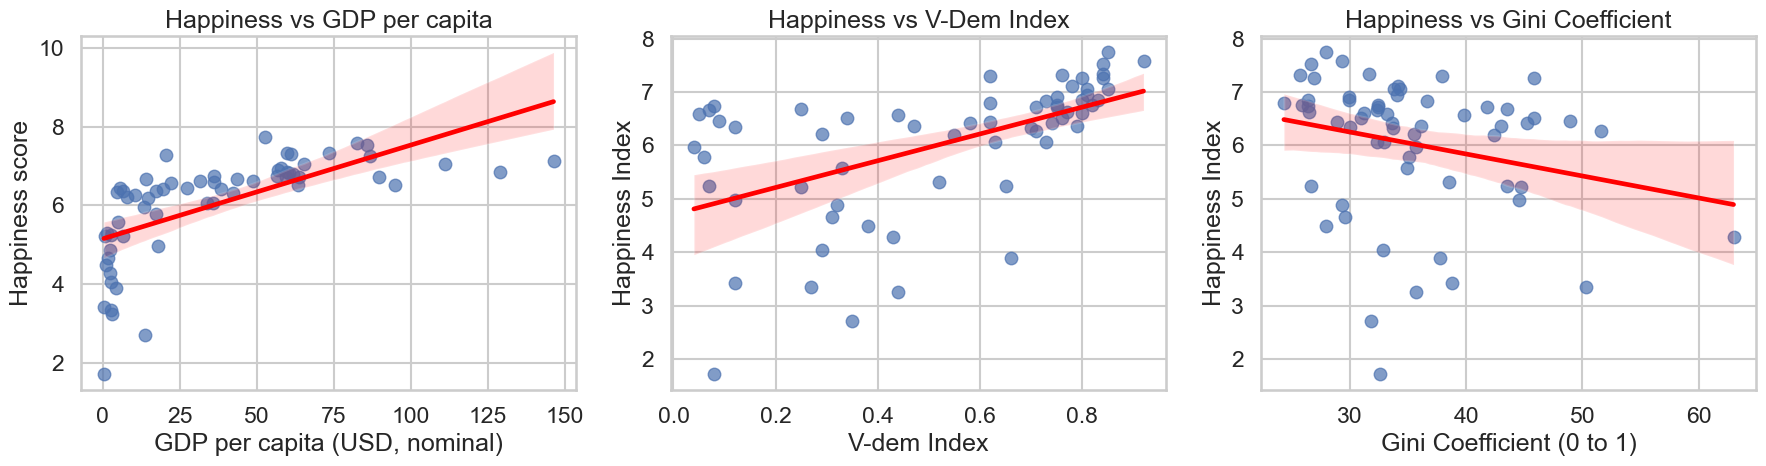

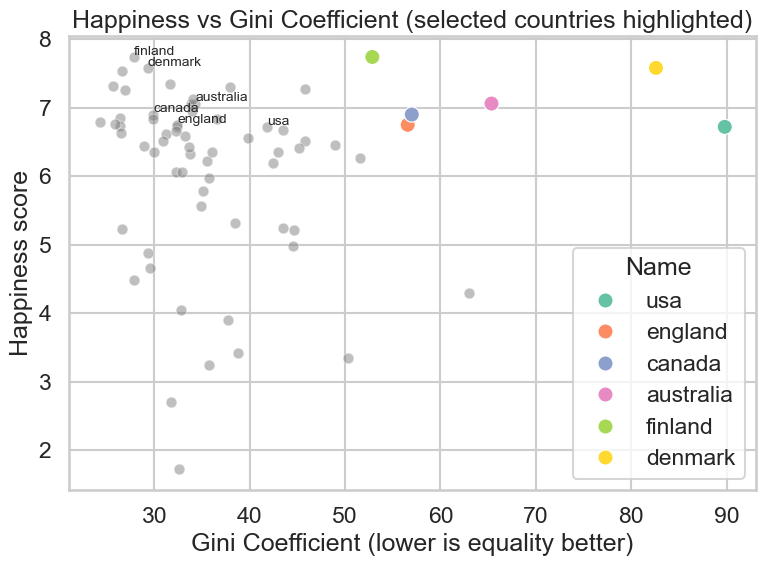

                            OLS Regression Results                            
Dep. Variable:        happiness_index   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     16.19
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           9.25e-08
Time:                        01:39:06   Log-Likelihood:                -84.418
No. Observations:                  62   AIC:                             176.8
Df Residuals:                      58   BIC:                             185.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7106      0.747      6.

In [2]:
from data import countries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load your data
# Expected columns: country, year, gdp_per_capita, happiness_score, gini, vdem_index
df = pd.DataFrame(countries)
df['gdp_per_capita'] = df['gdp(billions)']/df['population(millions)']
print(f"Dataframe Columns: {list(df.columns)}")

# 2) Basic scatter plots with trend lines
sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A) Happiness vs GDP per capita
sns.regplot(data=df, x="gdp_per_capita", y="happiness_index", ax=axes[0],
            scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
axes[0].set_title("Happiness vs GDP per capita")
axes[0].set_xlabel("GDP per capita (USD, nominal)")
axes[0].set_ylabel("Happiness score")

# B) Happiness vs V-dem index (lower index means not democratic)
sns.regplot(data=df, x="v-dem_idx", y="happiness_index", ax=axes[1],
            scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
axes[1].set_title("Happiness vs V-Dem Index")
axes[1].set_xlabel("V-dem Index")
axes[1].set_ylabel("Happiness Index")

# C) Happiness vs Gini coefficient(lower is better means less unequality)
sns.regplot(data=df, x="gini_coef", y="happiness_index", ax=axes[2],
            scatter_kws={"alpha":0.7}, line_kws={"color":"red"})
axes[2].set_title("Happiness vs Gini Coefficient")
axes[2].set_xlabel("Gini Coefficient (0 to 1)")
axes[2].set_ylabel("Happiness Index")

plt.tight_layout()
plt.show()

# 3) Annotated highlights for selected countries
highlight = ["usa", "canada", "england", "australia", "denmark", "finland"]
df_h = df[df["name"].isin(highlight)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="gini_coef", y="happiness_index",
                alpha=0.5, color="gray", s=60)
sns.scatterplot(data=df_h, x="gdp_per_capita", y="happiness_index",
                s=120, hue="name", palette="Set2")
for _, r in df_h.iterrows():
    plt.text(r["gini_coef"], r["happiness_index"]+0.03, r["name"], fontsize=10)
plt.title("Happiness vs Gini Coefficient (selected countries highlighted)")
plt.xlabel("Gini Coefficient (lower is equality better)")
plt.ylabel("Happiness score")
plt.legend(title="Name")
plt.tight_layout()
plt.show()

# 4) Partial correlations controlling for GDP (does inequality matter beyond income?)
# Quick regression: happiness ~ gdp_per_capita + gini + vdem_index
import statsmodels.api as sm

X = df[["gdp_per_capita",'gini_coef',"v-dem_idx"]].copy()
X = sm.add_constant(X)
y = df["happiness_index"]

model = sm.OLS(y, X).fit()
print(model.summary())


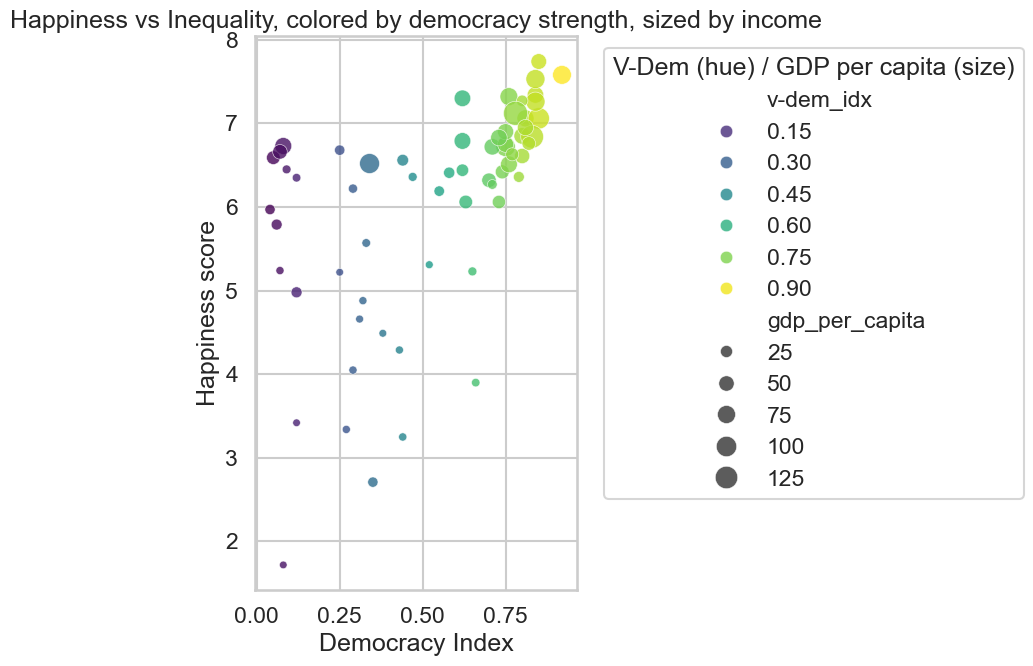

In [3]:
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=df, x="v-dem_idx", y="happiness_index",
    hue="v-dem_idx", size="gdp_per_capita",
    palette="viridis", sizes=(30, 300), alpha=0.8
)
plt.title("Happiness vs Inequality, colored by democracy strength, sized by income")
plt.xlabel("Democracy Index")
plt.ylabel("Happiness score")
plt.legend(title="V-Dem (hue) / GDP per capita (size)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


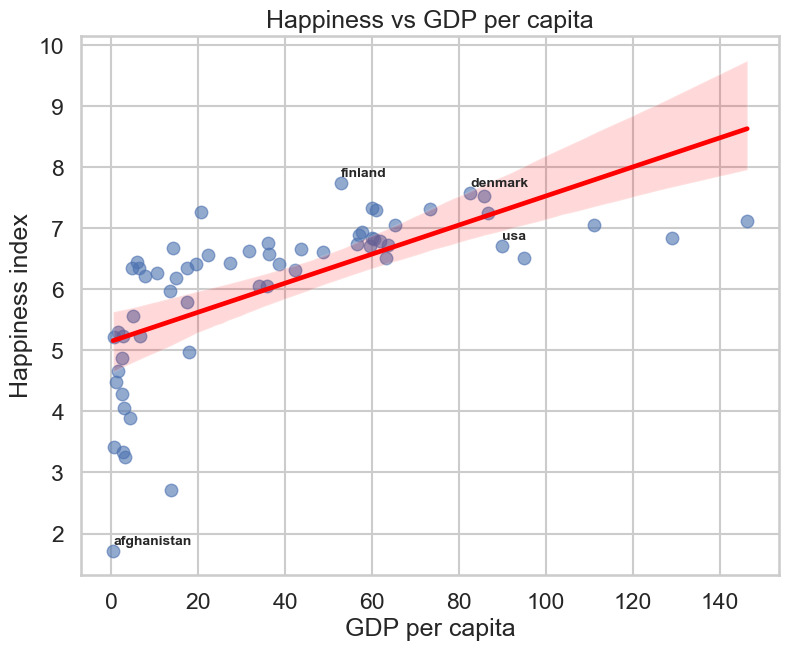

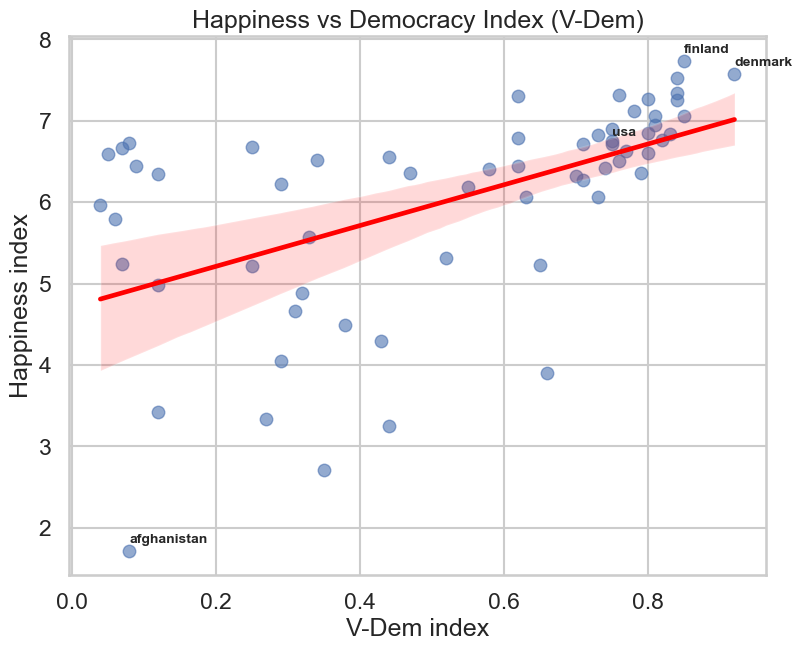

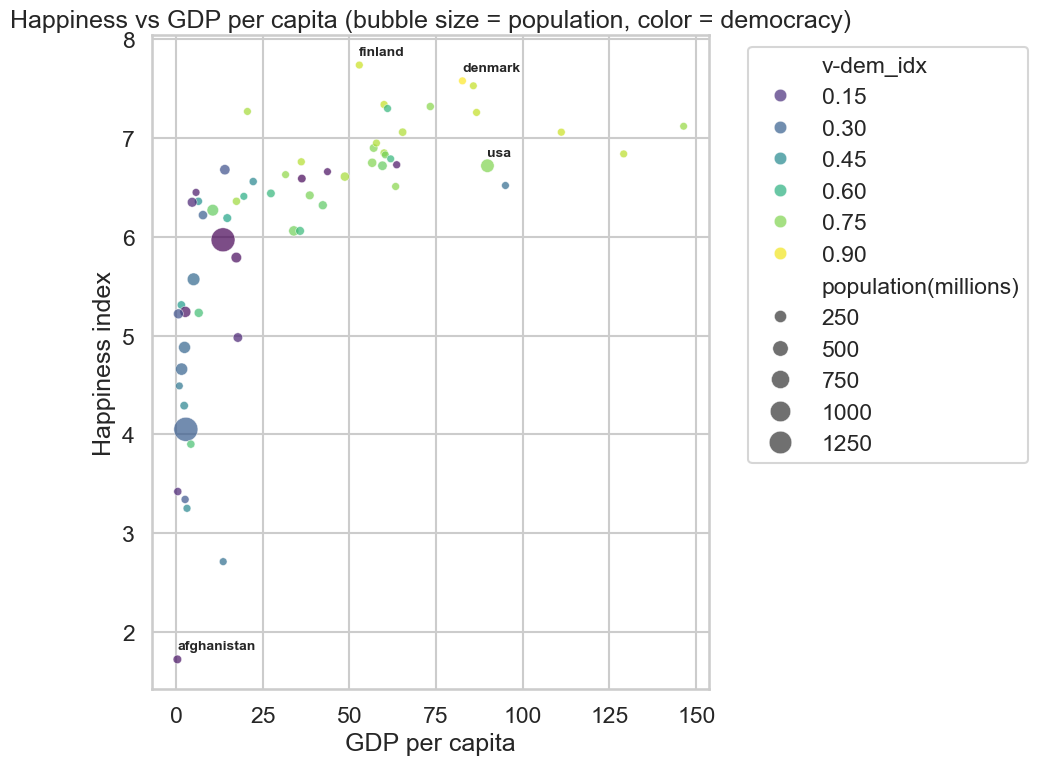

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your dataframe is called df with columns:
# country, gdp_per_capita, happiness_index, v_dem_idx, population

# 1. Happiness vs GDP per capita
plt.figure(figsize=(9,7))
sns.regplot(data=df, x="gdp_per_capita", y="happiness_index",
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Happiness vs GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness index")

# Annotate selected outliers
for c in ["afghanistan","usa","denmark","finland"]:
    row = df[df["name"]==c].iloc[0]
    plt.text(row["gdp_per_capita"], row["happiness_index"]+0.1, c, fontsize=10, weight="bold")
plt.show()


# 2. Happiness vs V-Dem index
plt.figure(figsize=(9,7))
sns.regplot(data=df, x="v-dem_idx", y="happiness_index",
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Happiness vs Democracy Index (V-Dem)")
plt.xlabel("V-Dem index")
plt.ylabel("Happiness index")

for c in ["afghanistan","usa","denmark","finland"]:
    row = df[df["name"]==c].iloc[0]
    plt.text(row["v-dem_idx"], row["happiness_index"]+0.1, c, fontsize=10, weight="bold")
plt.show()


# 3. Bubble chart: Happiness vs GDP per capita
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="gdp_per_capita", y="happiness_index",
                size="population(millions)", hue="v-dem_idx",
                sizes=(30, 300), palette="viridis", alpha=0.7)

plt.title("Happiness vs GDP per capita (bubble size = population, color = democracy)")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness index")

for c in ["afghanistan","usa","denmark","finland"]:
    row = df[df["name"]==c].iloc[0]
    plt.text(row["gdp_per_capita"], row["happiness_index"]+0.1, c, fontsize=10, weight="bold")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
X = df[['gdp(billions)', 'v-dem_idx', 'gini_coef']]
y = df['happiness_index']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
compare = pd.DataFrame({
'Country': df['name'].str.capitalize(),
'Actual':y,
'Predicted': y_pred,
'Errors(%)': (y - y_pred)/y
})
all = compare.sort_values('Actual')
display(round(all,2))

,Country,Actual,Predicted,Errors(%)
52,Afghanistan,1.72,4.97,-1.89
54,Lebanon,2.71,5.62,-1.07
53,Sierreleone,3.25,5.77,-0.78
55,Zimbabwe,3.34,5.13,-0.54
47,Malawi,3.42,4.96,-0.45
...,...,...,...,...
17,Netherlands,7.32,6.73,0.08
24,Sweden,7.34,6.80,0.07
61,Iceland,7.53,6.87,0.09
60,Denmark,7.58,7.03,0.07
